
optical hetero/homo - dyne detection
Modulated Optical signal is mixed with local oscillator.

c [m/s]
299792458.0

t_step [s]
4.00000E-16

freq_rf [Hz]
1.00000E+11

Light Frequency1: lightfreq1 [Hz]
1.93414E+14

Light Frequency2: lightfreq2 [Hz]
1.92793E+14

Difference Frequency: freq_diff [Hz]
6.21912E+11



C:\Users\swako\AppData\Local\Temp\ipykernel_22744\2014133381.py:105: ComplexWarning: Casting complex values to real discards the imaginary part
  Port1_1_EFcol[ii] = Port1_1_Eout
C:\Users\swako\AppData\Local\Temp\ipykernel_22744\2014133381.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  Port1_2_EFcol[ii] = Port1_2_Eout
C:\Users\swako\AppData\Local\Temp\ipykernel_22744\2014133381.py:119: ComplexWarning: Casting complex values to real discards the imaginary part
  Port3_1_EFcol[ii] = Port3_1_Eout
C:\Users\swako\AppData\Local\Temp\ipykernel_22744\2014133381.py:126: ComplexWarning: Casting complex values to real discards the imaginary part
  Port3_2_EFcol[ii] = Port3_2_Eout


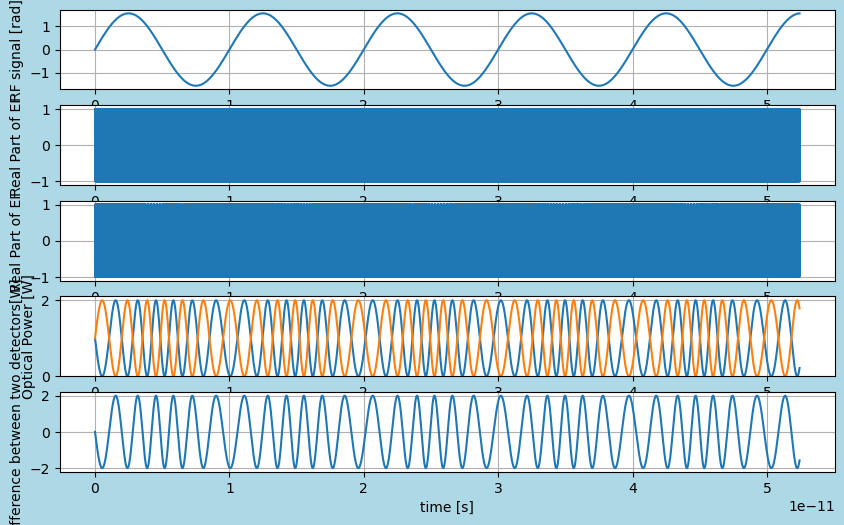

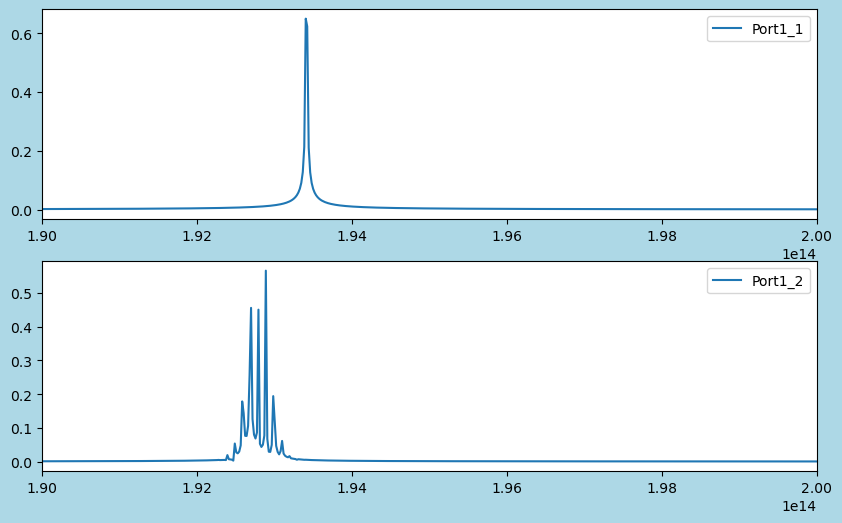

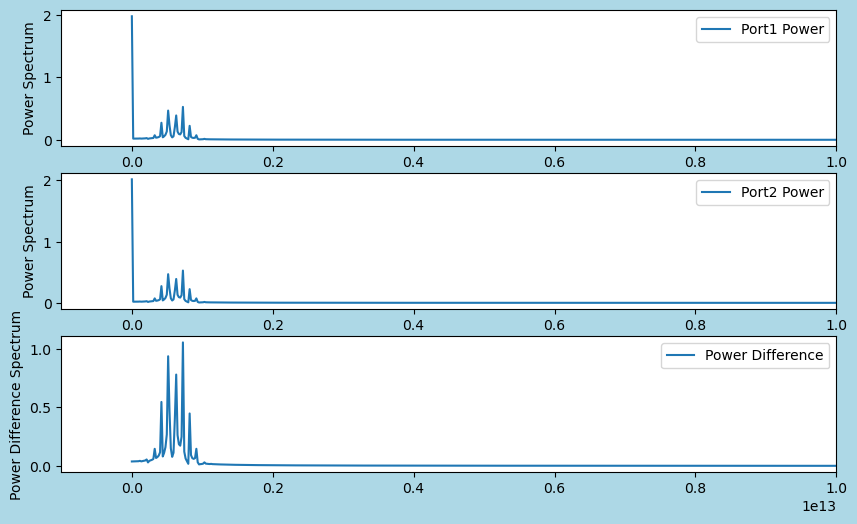

In [13]:

import numpy as np
import matplotlib.pyplot as plt
import pulse_broadening_in_optical_fibers_def
from scipy.fft import fft, fftfreq
from scipy.constants import c 

print('')
print('optical hetero/homo - dyne detection')
print('Modulated Optical signal is mixed with local oscillator.')
print('')

print("c [m/s]")
print(c)
print('')

samplerate = 8*16384 # Number of Points

t_step = 4 * 1e-16 #[s]

print("t_step [s]")
print(f'{t_step:.5E}')
print('')

tcol = np.linspace(0.0, t_step * samplerate, samplerate, endpoint=False)

amp_c = 0.5 * np.pi
#amp_c = 0
freq_rf = 100e9 # [Hz]

print("freq_rf [Hz]")
print(f'{freq_rf:.5E}')
print('')

md = 1 # modulation depth. 1 = 100 %
dc_offset = 0 # DC offset

no = 1 # Refractive Index of medium

oplcommon1=100 #Common Path Length 1
oplcommon2=100 #Common Path Length 2

opl1 =100 
opl2= 100

wl1 = 1550e-9 
wl2 = 1555e-9

# If wl1 and wl2 are equal, homodyne. If not, heterodyne.

lightfreq1 = c / wl1
print("Light Frequency1: lightfreq1 [Hz]")
print(f'{lightfreq1:.5E}')
print("")

lightfreq2 = c / wl2
print("Light Frequency2: lightfreq2 [Hz]")
print(f'{lightfreq2:.5E}')
print("")

freq_diff = lightfreq1-lightfreq2

print("Difference Frequency: freq_diff [Hz]")
print(f'{freq_diff:.5E}')
print("")


PT1 = 0.5 # PT: Power Transmission of Beam splitter

# Define Input Electric Field: Both 1 and 2 port

#Ein1 = np.array([[1+0j],[1-0j]]) 
Ein1 = np.array([[0.707+0.707j],[-0.707-0.707j]])
#Ein1 = np.array([[1 + 0j],[-1 - 0j]])

#tcol = np.zeros(samplerate)
rf_signalcol = np.zeros(samplerate)

Port1_1_EFcol = np.zeros(samplerate)
Port1_2_EFcol = np.zeros(samplerate)

Port3_1_EFcol = np.zeros(samplerate)
Port3_1_powercol = np.zeros(samplerate)

Port3_2_EFcol = np.zeros(samplerate)
Port3_2_powercol = np.zeros(samplerate)

Power_diffcol = np.zeros(samplerate)


for ii in range(samplerate):
    
    t = tcol[ii]

    rf_signal = amp_c * np.sin(2 * np.pi * freq_rf * t) + dc_offset #[rad]
    rf_signalcol[ii] = rf_signal  
    
    #Phase Modulation. Path Length

    phase1 = 2*np.pi * lightfreq1 * t # phase of local oscillator [rad]
    phase2 = 2*np.pi * lightfreq2 * t + rf_signal #[rad]

    Eout1 = pulse_broadening_in_optical_fibers_def.propagate(phase1, phase2, Ein1)
    
    Port1_1_Eout = Eout1[0,0] # Modulated Light signal
    Port1_1_EFcol[ii] = Port1_1_Eout
    
    Port1_2_Eout = Eout1[1,0] # Local Oscillator
    Port1_2_EFcol[ii] = Port1_2_Eout

    Ein2 = Eout1

    Eout2 = pulse_broadening_in_optical_fibers_def.beamsplitter(PT1, Ein2)
    Ein3 = Eout2    
   
    Eout3 = pulse_broadening_in_optical_fibers_def.propagate(1, 1, Ein3)
    
    #Trans
    Port3_1_Eout = Eout3[0,0]
    Port3_1_EFcol[ii] = Port3_1_Eout

    power3_1 = (np.abs(Port3_1_Eout))**2 # Optical power is calculated as squared of absolute electric field strength
    Port3_1_powercol[ii] = power3_1

    #Reflect
    Port3_2_Eout = Eout3[1,0] 
    Port3_2_EFcol[ii] = Port3_2_Eout

    power3_2 = (np.abs(Port3_2_Eout))**2
    Port3_2_powercol[ii] = power3_2
    
    # Diff
    Power_diff = power3_1 - power3_2
    Power_diffcol[ii] = Power_diff
 
fig1 = plt.figure(figsize = (10,6), facecolor='lightblue')

ax1 = fig1.add_subplot(5, 1, 1)
ax2 = fig1.add_subplot(5, 1, 2)
ax3 = fig1.add_subplot(5, 1, 3)
ax4 = fig1.add_subplot(5, 1, 4)
ax5 = fig1.add_subplot(5, 1, 5)

ax1.plot(tcol,rf_signalcol)
ax1.set_ylabel("RF signal [rad]")
#ax1.set_ylim(-3.14,3.14)
ax1.grid()

ax2.plot(tcol,np.real(Port1_1_EFcol))
ax2.set_ylabel("Real Part of EF")
#ax2.set_ylim(-3, 3)
ax2.grid()

ax3.plot(tcol,np.real(Port1_2_EFcol))
ax3.set_ylabel("Real Part of EF")
#ax2.set_ylim(-3, 3)
ax3.grid()

ax4.plot(tcol,Port3_1_powercol,tcol,Port3_2_powercol)
ax4.set_ylabel("Optical Power [W]")
ax4.set_ylim(0,2.1)
ax4.grid()

ax5.plot(tcol,Power_diffcol)
ax5.set_xlabel("time [s]")
ax5.set_ylabel("Power Difference between two detectors[W]")
ax5.grid()


fig2 = plt.figure(figsize = (10,6), facecolor='lightblue')

ax2_1 = fig2.add_subplot(2, 1, 1)
ax2_2 = fig2.add_subplot(2, 1, 2)
#ax2_3 = fig2.add_subplot(4, 1, 3)
#ax2_4 = fig2.add_subplot(4, 1, 4)

xf = fftfreq(samplerate, t_step)[:samplerate//2]

Port1_1_EFcol_f = fft(Port1_1_EFcol)
Port1_2_EFcol_f = fft(Port1_2_EFcol)

ax2_1.plot(xf, 2.0/samplerate * np.abs(Port1_1_EFcol_f[0:samplerate//2]),label="Port1_1")
ax2_1.set_xlim(190e12,200e12)
ax2_1.legend()

ax2_2.plot(xf, 2.0/samplerate * np.abs(Port1_2_EFcol_f[0:samplerate//2]),label="Port1_2")
ax2_2.set_xlim(190e12,200e12)
ax2_2.legend()

fig3 = plt.figure(figsize = (10,6), facecolor='lightblue')
ax3_1 = fig3.add_subplot(3, 1, 1)
ax3_2 = fig3.add_subplot(3, 1, 2)
ax3_3 = fig3.add_subplot(3, 1, 3)

Port1_powercol_f = fft(Port3_1_powercol)
Port2_powercol_f = fft(Port3_2_powercol)

ax3_1.plot(xf, 2.0/samplerate * np.abs(Port1_powercol_f[0:samplerate//2]),label="Port1 Power")
ax3_1.set_ylabel("Power Spectrum")
ax3_1.set_xlim(-1e12,10e12)
ax3_1.legend()

ax3_2.plot(xf, 2.0/samplerate * np.abs(Port2_powercol_f[0:samplerate//2]), label="Port2 Power")
ax3_2.set_ylabel("Power Spectrum")
ax3_2.set_xlim(-1e12,10e12)
ax3_2.legend()

Power_diffcol_f = fft(Power_diffcol)
ax3_3.plot(xf, 2.0/samplerate * np.abs(Power_diffcol_f[0:samplerate//2]), label="Power Difference")
ax3_3.set_ylabel("Power Difference Spectrum")
ax3_3.set_xlim(-1e12,10e12)
ax3_3.legend()

plt.show()



[1.5000000e+14 1.5002442e+14 1.5004884e+14 ... 2.4995116e+14 2.4997558e+14
 2.5000000e+14]
[1.99861639e-06 1.99829106e-06 1.99796585e-06 ... 1.19940415e-06
 1.19928698e-06 1.19916983e-06]
[9.42477796e+14 9.42631232e+14 9.42784667e+14 ... 1.57048946e+15
 1.57064289e+15 1.57079633e+15]
[1.67195635 1.67196975 1.67198314 ... 1.69926444 1.69926787 1.69927131]
[1.7547696  1.75475429 1.75473899 ... 1.73404858 1.73404754 1.7340465 ]
[-0.09358035 -0.0935243  -0.0934683  ... -0.0110603  -0.01105482
 -0.01104934]


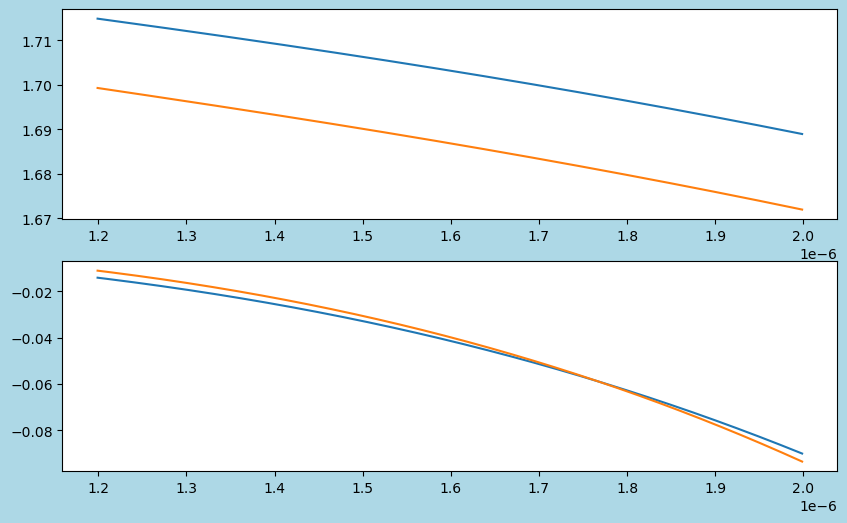

In [14]:
# pulses_fiber_10G

from wl_freq_omega_def import wl_freq_omega
from sellmeier_def import sellmeiercore, sellmeierclad

#startfreq = 194e12
#stopfreq = 194.05e12
startfreq = 150e12
stopfreq = 250e12


mm = 4096 # 2048, 4096, 8192, 16384

freqcol, wlcol, omegacol, kcol = wl_freq_omega(startfreq, stopfreq, mm)

print(freqcol)
print(wlcol)
print(omegacol)

ncorecol, Ncorecol, scorecol = sellmeiercore(1e6*wlcol)	#get index !! input wavelength as um

ncladcol, Ncladcol, scladcol = sellmeierclad(1e6*wlcol)	#get index !! input wavelength as um

betacol = kcol
#betacol = kcol* np.sqrt((ncladcol)**2 + ((ncorecol)**2 - (ncladcol)**2))

distance = 1 * 1000

print(ncladcol)
print(Ncladcol)
print(scladcol)


fig4 = plt.figure(figsize = (10,6), facecolor='lightblue')
ax4_1 = fig4.add_subplot(2, 1, 1)
ax4_2 = fig4.add_subplot(2, 1, 2)

ax4_1.plot(wlcol, ncorecol, wlcol, ncladcol,)
ax4_2.plot(wlcol, scorecol, wlcol, scladcol)



In [15]:

# c = 2.99792458 * 1e8;	%m/sec
#  centerfreq = 194.05*1e12;
#  widthfreq = 1000*1e9;	%Hz

#startfreq = centerfreq - 0.5.* widthfreq
# stepfreq = widthfreq / mm; % Hz
 

#  eyezoomin = 6;
#  NRZ = 50;
#   judgevoltage = 0.5;
#   bitrate = 10e9; %1073741824	% bps;
#   timeperbit = 1/(bitrate)
#  pulsestowatch = 10;
#b = 0.0;
   
"""
[ncorecol, Ncorecol, scorecol] = sellmeiercore(wlcol)	#get index !! input wavelength as um
betacorecol = kcol* ncorecol

[ncladcol, Ncladcol, scladcol] = sellmeierclad(wlcol)	#get index !! input wavelength as um
betacladcol = kcol* ncladcol;

betacol = kcol* np.sqrt((ncladcol).^2 + ((ncorecol).^2 - (ncladcol).^2) .* b)
  
 
polyfitbeta = np.polyfit(omegacol,betacol,3) #fitting by 3rd order
betaestcol = np.polyval(polyfitbeta,omegacol)# get
 
dpolyfitbeta = np.polyder(polyfitbeta)#;%derivate
dbetadomegacol = np.polyval(dpolyfitbeta,omegacol)#;%get
 
fig4 = plt.figure(figsize = (10,6), facecolor='lightblue')
#set(fig2,'Position',[100 400 600 300])

plot(1e-12.* omegacol,1.0001e-6.* betacol,'r-',...
   1e-12.* omegacol,1e-6.* betaestcol,'g-',...
      1e-12.* omegacol,1e-6.* betacorecol,'b-',...
   1e-12.* omegacol,1e-6.* betacladcol,'y-');

xlabel('T [Hz]','FontSize',12); 	ylabel('beta [rad / m]','FontSize',9);
  
#fig5 = figure(5);
#set(fig5,'Position',[320 50 400 300])
#plot(1e-12.* omegacol,dbetadomegacol);
#xlabel('T','FontSize',9);  
#ylabel('dbetadomega','FontSize',9);

 polyfitdbetadomega = polyfit(omegacol,dbetadomegacol,2);%fitting
 dpolyfitbetadomega = polyder(polyfitdbetadomega);%derivate
 ddbetaddomegacol = polyval(dpolyfitbetadomega,omegacol);%get


fig5 = plt.figure(figsize = (10,6), facecolor='lightblue')

set(fig3,'Position',[320 50 500 320])
plot(1e-12.* freqcol, 1e24.* ddbetaddomegacol); 
% probably correct !! p.73 of NTT book.
xlabel('freq [THz]','FontSize',9);
ylabel('ddbetaddomega [ps^2 / m] ','FontSize',9);

 Dcol = -1.* omegacol.* ddbetaddomegacol ./ wlcol;

fig6 = plt.figure(figsize = (10,6), facecolor='lightblue')
set(fig4,'Position',[320 50 500 320])
plot(1e-12.* freqcol, 1e6.* Dcol); 
% probably correct !! p.73 of NTT book.
xlabel('freq [THz]','FontSize',9);
ylabel('D [ps/(nm*km)]','FontSize',12);


tstep = 1/(stepfreq*mm*1) # sec I think this sould be 1 !! not 2 !!!!


resolutionperpulse = timeperbit / tstep
[tcol, pulsescol] = signalgenerate_square(mm, tstep, bitrate, resolutionperpulse, NRZ);

fftpulsescol = (fft(pulsescol));
freqmax = 1/tstep 
fcol = [freqmax/mm : freqmax/mm : freqmax]';

fig7 = plt.figure(figsize = (10,6), facecolor='lightblue')
set(fig5,'Position',[320 400 600 270])
plot(1e-9*fcol, abs(fftpulsescol).^2)
xlabel(' GHz','FontSize',9);
xlim([0 1.0*1e-9* freqmax])
title('Power');
% make profile

nfftpulsescol = [fftpulsescol(0.5*mm+1:mm);fftpulsescol(1:0.5*mm)];

fig8 = plt.figure(figsize = (10,6), facecolor='lightblue')
set(fig7,'Position',[320 50 300 270])
plot(1e-9*fcol, abs(nfftpulsescol).^2)
xlabel('GHz');title('Power');

#___________________________________________________________

expFcol = np.zeros(mm);
for ii = 1:mm
   gamma = 0.5 .* ddbetaddomegacol(ii) .* omegacol(ii).^2;
   expF = exp(-j.* gamma .* distance) .* nfftpulsescol(ii) ;
   %expF = nfftpulsescol(ii);

   expFcol(ii,1) = expF;
end

fig9 = plt.figure(figsize = (10,6), facecolor='lightblue')
#set(fig8,'Position',[320 50 700 270])
#plot(abs(nfftpulsescol) + 100,'r');hold on;
#plot(abs(expFcol), 'b');hold off;

nexpFcol = [expFcol(0.5*mm+1:mm);expFcol(1:0.5*mm)];
ifftnexpFcol = ifft(nexpFcol);

fig10 = plt.figure(figsize = (10,6), facecolor='lightblue')

set(fig9,'Position',[20 50 1100 270])
plot(1e9.* tcol,abs(pulsescol).^2,'r-',...
   1e9.* tcol,abs(ifftnexpFcol).^2,'b-');%,1e9.* tcol,real(pulses2col),'g-')
xlabel(' nanosec','FontSize',9);grid on;
title('Power');
maxt = 1e9.* max(tcol)
xlim([0, timeperbit * pulsestowatch *1e9])
ylim([0, 2])

eyepatternstep = resolutionperpulse * 1.5
ttcol = zeros(mm,1);
for ii = 1:mm
   tt = mod(ii,eyepatternstep);  
   ttcol(ii,1) = tt * tstep;
end


#fig11 = plt.figure(figsize = (10,6), facecolor='lightblue')
#set(fig10,'Position',[20 100 600 270]);
#plot(1e9.* ttcol,abs(pulsescol).^2,'r.',1e9.* ttcol,abs(ifftnexpFcol).^2,'b.-',...
#   1e9.* tstep .* [eyezoomin eyezoomin],[0,1.5],'g-');
#xlabel(' nanosec','FontSize',9);grid on;
#title('Power');

#      [nvaluzerocol, nvaluonecol] =...
#   eyepattern_func(mm, ifftnexpFcol, eyepatternstep, eyezoomin, judgevoltage);


   
#   [meanzero, stdzero, meanone, stdone, Q, ber] = ...
#      getber(nvaluzerocol, nvaluonecol)
#disp('****************************************************')
   

#fig12 = plt.figure(figsize = (10,6), facecolor='lightblue')
#%set(fig11,'Position',[20 100 600 270])
#%stem(valucol,'o-');
"""

"\n[ncorecol, Ncorecol, scorecol] = sellmeiercore(wlcol)\t#get index !! input wavelength as um\nbetacorecol = kcol* ncorecol\n\n[ncladcol, Ncladcol, scladcol] = sellmeierclad(wlcol)\t#get index !! input wavelength as um\nbetacladcol = kcol* ncladcol;\n\nbetacol = kcol* np.sqrt((ncladcol).^2 + ((ncorecol).^2 - (ncladcol).^2) .* b)\n  \n \npolyfitbeta = np.polyfit(omegacol,betacol,3) #fitting by 3rd order\nbetaestcol = np.polyval(polyfitbeta,omegacol)# get\n \ndpolyfitbeta = np.polyder(polyfitbeta)#;%derivate\ndbetadomegacol = np.polyval(dpolyfitbeta,omegacol)#;%get\n \nfig4 = plt.figure(figsize = (10,6), facecolor='lightblue')\n#set(fig2,'Position',[100 400 600 300])\n\nplot(1e-12.* omegacol,1.0001e-6.* betacol,'r-',...\n   1e-12.* omegacol,1e-6.* betaestcol,'g-',...\n      1e-12.* omegacol,1e-6.* betacorecol,'b-',...\n   1e-12.* omegacol,1e-6.* betacladcol,'y-');\n\nxlabel('T [Hz]','FontSize',12); \tylabel('beta [rad / m]','FontSize',9);\n  \n#fig5 = figure(5);\n#set(fig5,'Position',[3